In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

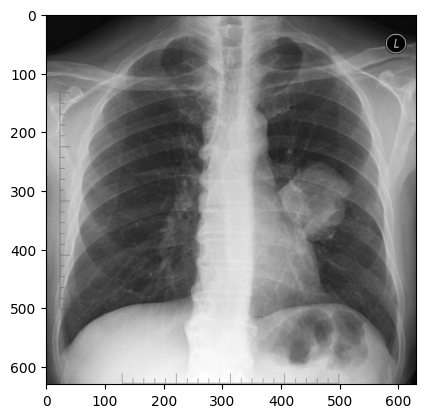

In [26]:
img = cv2.imread('lung.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

Threshold limit:  129.0


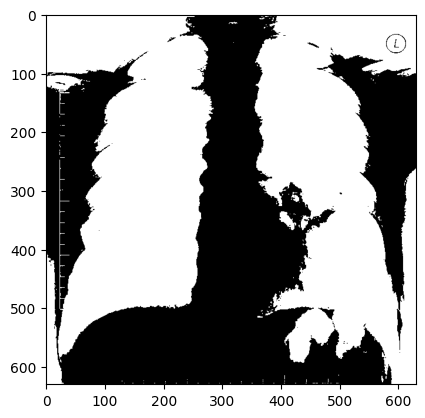

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print(ret)

plt.imshow(thresh, cmap='gray')

In [28]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel=kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel=kernel, iterations=3)
#foreground
dist_transfrom = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transfrom, 0.8 * dist_transfrom.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unkown = cv2.subtract(sure_bg, sure_fg)

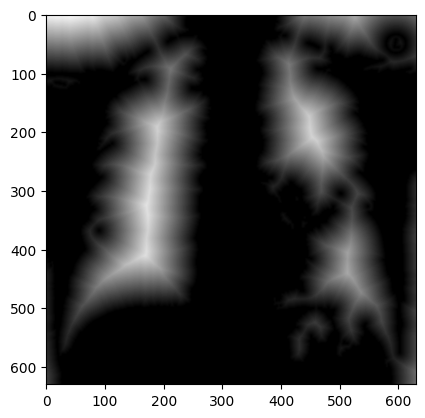

In [29]:
plt.imshow(dist_transfrom, cmap='gray')

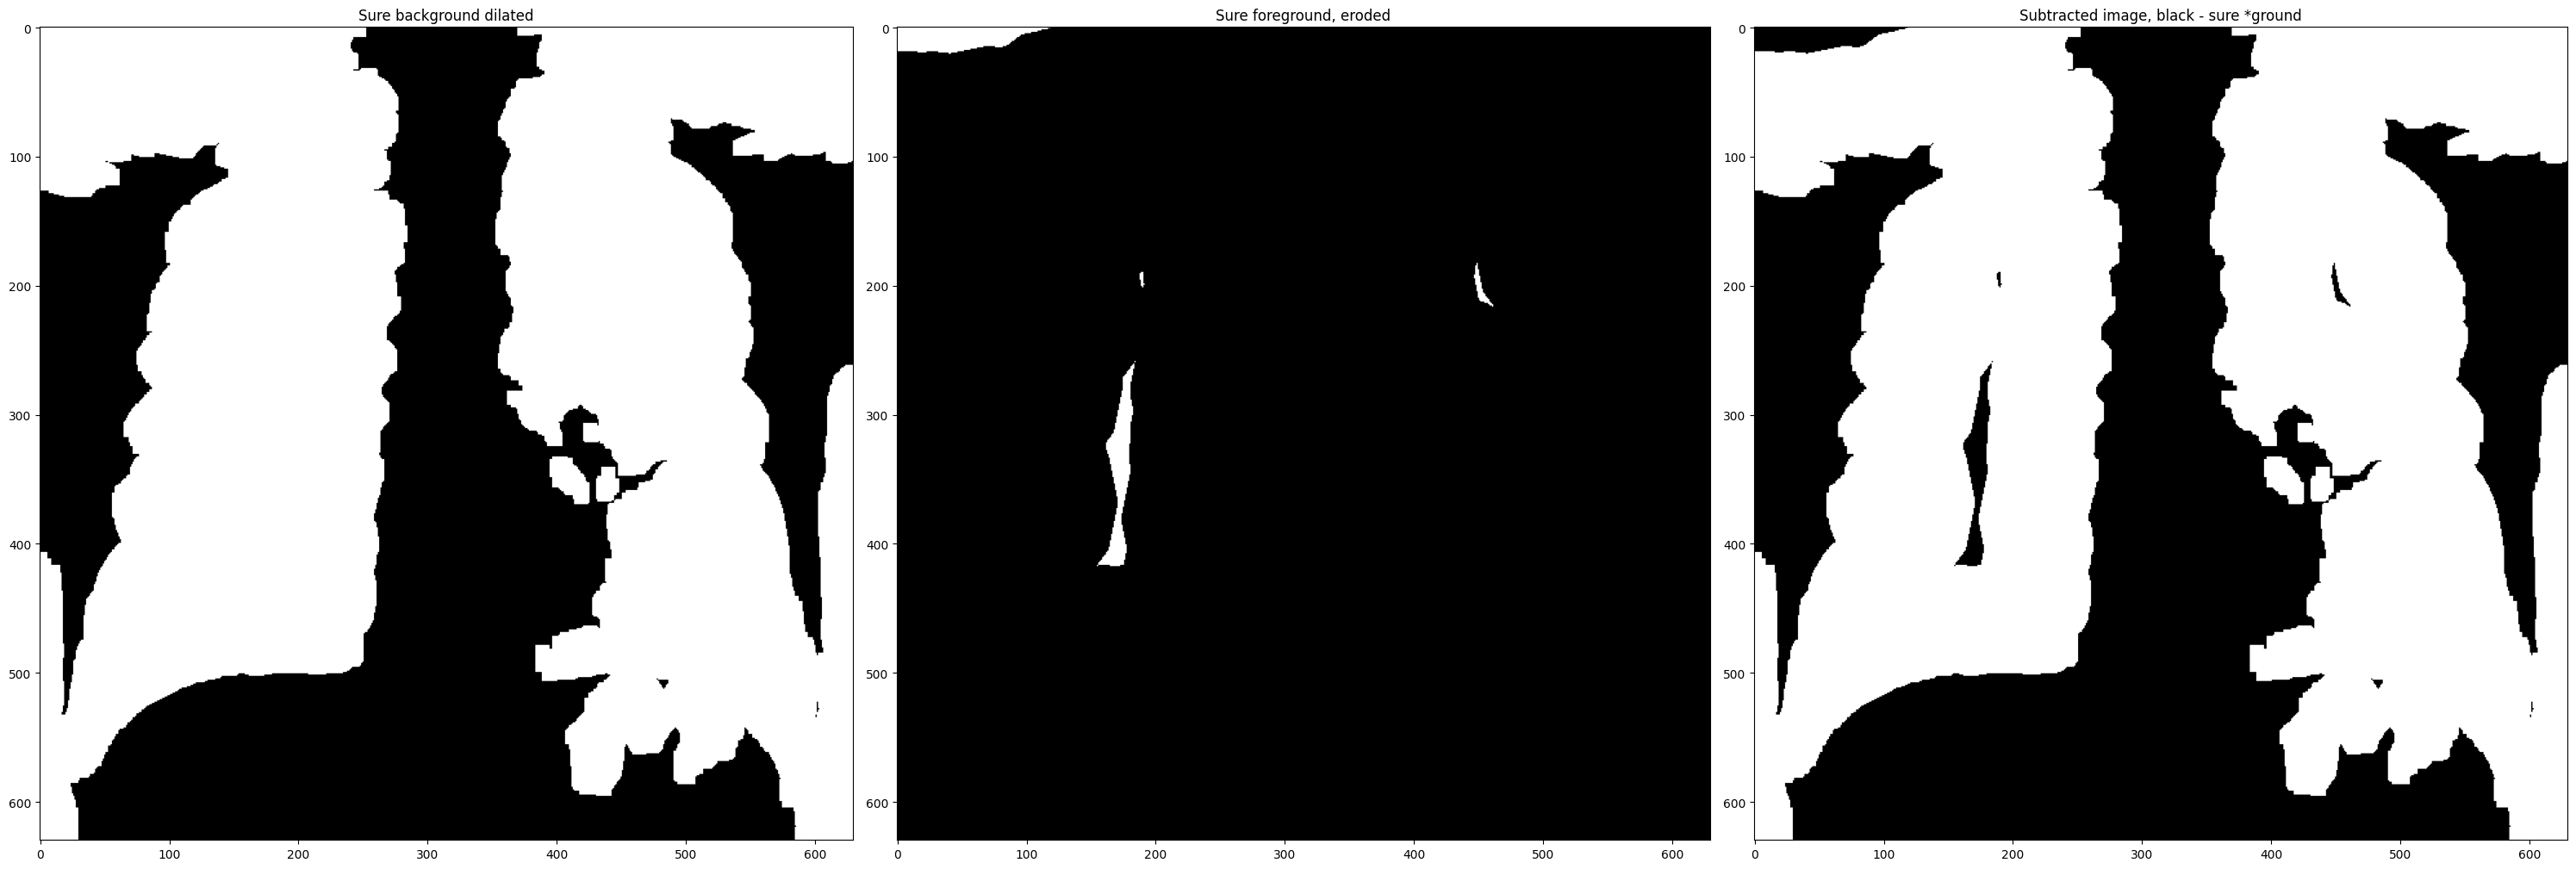

In [30]:
fig = plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.imshow(sure_bg, cmap='gray')

plt.title('Sure background dilated')

plt.subplot(1, 3, 2)
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure foreground, eroded')

plt.subplot(1, 3, 3)
plt.imshow(unkown, cmap='gray')
plt.title('Subtracted image, black - sure *ground')
plt.tight_layout()


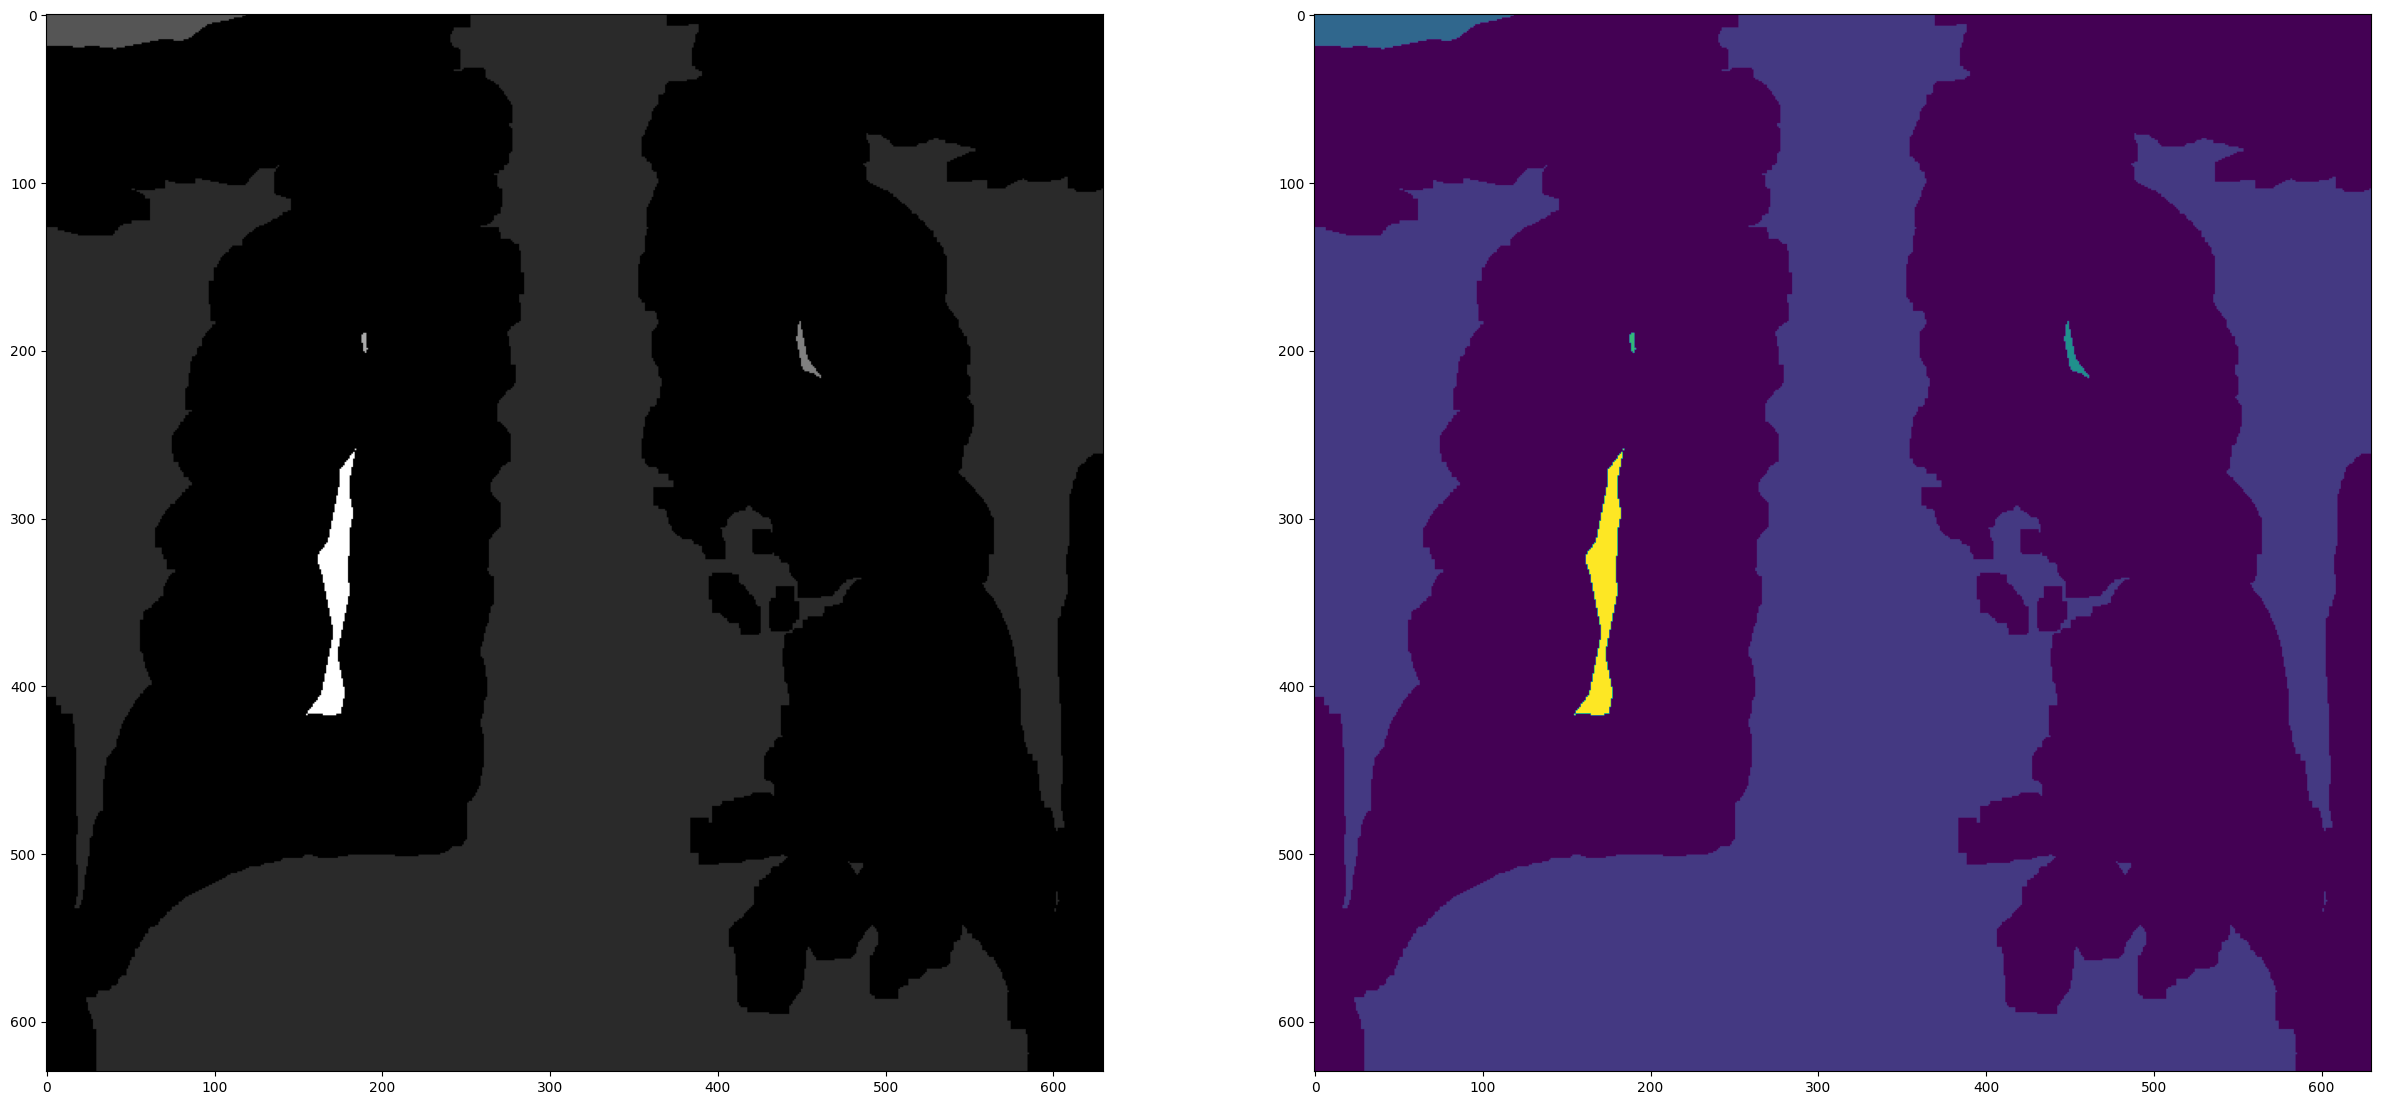

In [31]:
ret, markers = cv2.connectedComponents(sure_fg)

markers += 1

markers[unkown == 255] = 0
fig = plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.imshow(markers, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(markers)

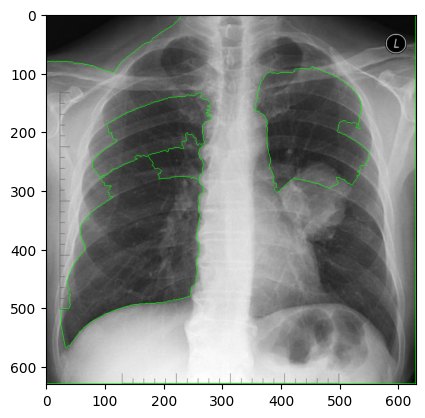

In [32]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255, 0]

plt.imshow(img)